# 2-逻辑回归-线性不可分
## 案例：决定是否芯片要被接受或抛弃
### 数据集：ex2data2.txt，芯片在两次测试中的结果

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data2.txt'
data = pd.read_csv(path,names=['Test 1','Test 2','Accepted'])
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


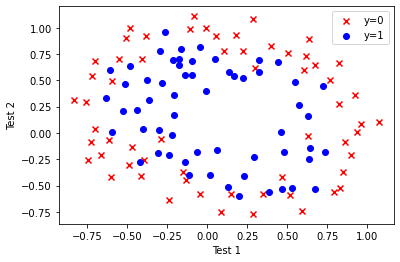

In [3]:
fig,ax = plt.subplots()

ax.scatter(data[data['Accepted']==0]['Test 1'],data[data['Accepted']==0]['Test 2'],c='r',marker='x',label='y=0') #y=0的散点图
ax.scatter(data[data['Accepted']==1]['Test 1'],data[data['Accepted']==1]['Test 2'],c='b',marker='o',label='y=1') #y=1的散点图
ax.legend()

ax.set(xlabel='Test 1',ylabel='Test 2')
plt.show()

### 特征映射

In [4]:
def feature_mapping(x1,x2,power):
    """特征映射函数 power为阶次"""
    data = {}
    
    for i in np.arange(power+1):
        for j in np.arange(i+1):
            data['F{}{}'.format(i-j,j)] = np.power(x1,i-j)*np.power(x2,j)
    
    return pd.DataFrame(data)

In [5]:
x1 = data['Test 1']
x2 = data['Test 2']
data2 = feature_mapping(x1,x2,6)
data2.head()

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


### 构造数据集

In [6]:
X = data2.values
X.shape

(118, 28)

In [7]:
y = data.iloc[:,-1].values
y = y.reshape(len(y),1)
y.shape

(118, 1)

In [8]:
def sigmoid(z):
    
    return 1/(1 + np.exp(-z))

In [9]:
def costFunction(X,y,theta,lamda):
    
    y_ = sigmoid(X@theta)
    first = y * np.log(y_)
    second = (1-y) * np.log(1-y_)
    
    reg = np.sum(np.power(theta[1:],2)) * (lamda / (2 * len(X))) #正则化项
    
    return - np.sum(first+second) / len(X) + reg

In [10]:
theta = np.zeros((28,1))
lamda = 1
theta.shape

(28, 1)

In [11]:
cost_init = costFunction(X,y,theta,lamda)
print(cost_init)

0.6931471805599454


In [12]:
def gradientDescent(X,y,theta,iters,alpha,lamda,isprint=False):
    m = len(X)
    costs = []
    
    for i in range(iters):
        reg = theta[1:] * (lamda / len(X))
        reg = np.insert(reg,0,values=0,axis=0) #插入0行使得维数匹配
        
        theta = theta - (alpha/m) * X.T @ (sigmoid(X@theta) - y) - reg
        cost = costFunction(X,y,theta,lamda)
        costs.append(cost)
        
        if isprint == True:
            if i % 10000 == 0:
                print(cost)
    return costs,theta

In [13]:
alpha = 0.001
iters = 200000
lamda = 0.001

In [14]:
costs,theta_final = gradientDescent(X,y,theta,iters,alpha,lamda,True)

0.693134380798985
0.625774925450325
0.5896107446192148
0.5643696405879911
0.5455316512037752
0.5309931250215412
0.5195233242153316
0.5103244241333585
0.5028503689196948
0.49671356013516815
0.49163100838726903
0.48739124660494515
0.4838331237738637
0.4808317574543443
0.47828896613342015
0.4761265929678997
0.4742817461143651
0.47270333978453216
0.47134953689489356
0.47018582868672504


In [15]:
def predict(X,theta):
    """预测结果函数"""
    prob = sigmoid(X@theta)
    return [1 if x>= 0.5 else 0 for x in prob]

In [16]:
y_ = np.array(predict(X,theta_final))
y_pre = y_.reshape(len(y_),1) #计算预测值并转换成数组

acc = np.mean(y_pre == y) #计算平均正确率

print(acc)

0.8305084745762712


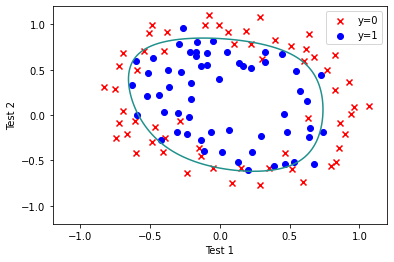

In [17]:
x = np.linspace(-1.2,1.2,200)
xx,yy = np.meshgrid(x,x)
z = feature_mapping(xx.ravel(),yy.ravel(),6).values
zz = z@theta_final
zz = zz.reshape(xx.shape)

fig,ax = plt.subplots()

ax.scatter(data[data['Accepted']==0]['Test 1'],data[data['Accepted']==0]['Test 2'],c='r',marker='x',label='y=0') #y=0的散点图
ax.scatter(data[data['Accepted']==1]['Test 1'],data[data['Accepted']==1]['Test 2'],c='b',marker='o',label='y=1') #y=1的散点图
ax.legend()

ax.set(xlabel='Test 1',ylabel='Test 2')

plt.contour(xx,yy,zz,0)

plt.show()